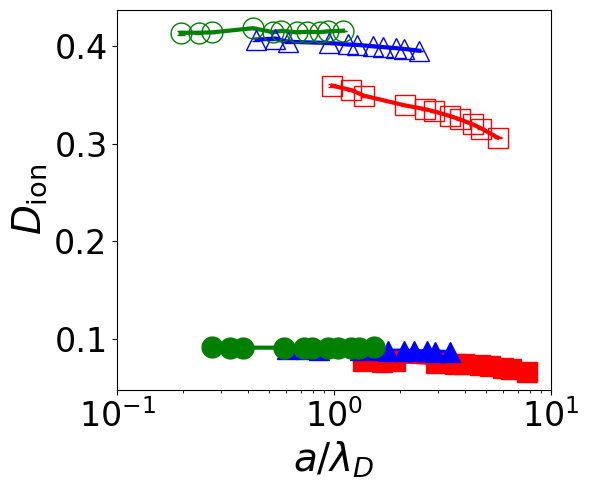

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "./"

# ----------------------------
#  Load x-data
# ----------------------------
x_df = pd.read_csv("a_lambda_D.csv")

# ----------------------------
#  파일 이름 정의
# ----------------------------
d_files = {
    "0.2_LJ": "Diffusion_fit_MD_0.2_LJ.csv",
    "0.2_WCA": "Diffusion_fit_MD_0.2_WCA.csv",
    "1_LJ":   "Diffusion_fit_MD_1_LJ.csv",
    "1_WCA":  "Diffusion_fit_MD_1_WCA.csv",
    "5_LJ":   "Diffusion_fit_MD_5_LJ.csv",
    "5_WCA":  "Diffusion_fit_MD_5_WCA.csv",
}

# ----------------------------
#  평균 D 계산 함수
# ----------------------------
def avg_with_error(cat, ani, cat_err, ani_err):
    D_mean = 0.5 * (cat + ani)
    D_err = 0.5 * np.sqrt(cat_err**2 + ani_err**2)
    return D_mean, D_err

# ----------------------------
#  load Dpp, Dmm (정확한 컬럼명에 맞춤)
# ----------------------------
def load_dpp_dmm(fname):
    df = pd.read_csv(file_path + fname)

    D_cat = df["Dpp"].values        # D++
    D_cat_err = df["Dpp_err"].values
    D_ani = df["Dmm"].values        # D--
    D_ani_err = df["Dmm_err"].values

    return D_cat, D_cat_err, D_ani, D_ani_err

# ----------------------------
#  D_mean, D_err 계산
# ----------------------------
D_mean, D_err = {}, {}

for key, fname in d_files.items():

    eps, model = key.split("_")   # "0.2_LJ" → ("0.2", "LJ")

    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(fname)

    D_mean[key], D_err[key] = avg_with_error(D_cat, D_ani, D_cat_err, D_ani_err)

# ----------------------------
#  Plot
# ----------------------------
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax1 = plt.subplots(figsize=(6, 5))

# LJ (filled markers)
for eps in ['0.2', '1', '5']:
    key = f"{eps}_LJ"
    ax1.plot(x_df[f"{eps}_LJ"], D_mean[key], color=color_map[eps], lw=3)
    ax1.errorbar(
        x_df[f"{eps}_LJ"], D_mean[key], yerr=D_err[key],
        fmt=marker_map[eps], color=color_map[eps],
        mfc=color_map[eps], mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} LJ"
    )

# WCA (open markers)
for eps in ['0.2', '1', '5']:
    key = f"{eps}_WCA"
    ax1.plot(x_df[f"{eps}_WCA"], D_mean[key], color=color_map[eps], lw=3)
    ax1.errorbar(
        x_df[f"{eps}_WCA"], D_mean[key], yerr=D_err[key],
        fmt=marker_map[eps], color=color_map[eps],
        mfc='none', mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} WCA"
    )

# Axis
ax1.set_xlabel(r'$a/{\lambda_D}$', fontsize=28)
ax1.set_ylabel(r'$D_{\mathrm{ion}}$', fontsize=28)
ax1.set_xscale("log")
ax1.set_xlim(0.1,10)
ax1.tick_params(axis='both', labelsize=24)

plt.tight_layout()
plt.show()